# Exploratory Data Analysis

## Library imports

In [1]:
import os
import gc
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

cwd = os.getcwd()
parent = cwd.replace('/notebooks', '')
sys.path.insert(0, parent) 

from utils import DataLoader

## Load the data

In [2]:
tellco_df = DataLoader("../data", "Week1_challenge_data_source.csv").read_csv()
shape = tellco_df.shape
display(tellco_df.head())
print(f"Our data has {shape[0]} rows and {shape[1]} columns")

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Our data has 150001 rows and 55 columns


In [3]:
# tellco_df.info()

## Datatype conversion

There are some columns that have the wrong data types. The `Start` and `End` columns should be datattime type, the `IMSI`, `MSISDN/Number`, `IMEI`, and `Bearer Id` should all be strings instead of numbers. 
This is because they are not measures of some feature. They are mostly Identifiers.  

In [4]:
tellco_df['Start']  = pd.to_datetime(tellco_df['Start'])
tellco_df['End']  = pd.to_datetime(tellco_df['End'])
tellco_df['IMSI']  = tellco_df['IMSI'].astype(str)
tellco_df['MSISDN/Number']  = tellco_df['MSISDN/Number'].astype(str)
tellco_df['IMEI']  = tellco_df['IMEI'].astype(str)
tellco_df['Bearer Id']  = tellco_df['Bearer Id'].astype(str)

In [5]:
tellco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      150001 non-null  object        
 7   MSISDN/Number                             150001 non-null  object        
 8   IMEI                                      150001 non-null  object        
 9   Last Location N

## Plotting functions

In [ ]:

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(5, 3))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

## Missing Values Analysis

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [8]:
def percent_missing(df):
    """
    Print out the percentage of missing entries in a dataframe
    """
    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(tellco_df)

The dataset contains 12.46 % missing values.


We can get more specific data about which columns have missing entries.

In [9]:
# ignore the ones that don't have missing entries
tellco_df.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

### Get numerical and object columns

In [14]:
numericals = tellco_df.select_dtypes(include='number').columns.tolist()
# display(numerical)
objects = tellco_df.select_dtypes(exclude=['number']).columns.tolist()
# display(objects)

In [18]:
tellco_df[numericals].skew(axis=0)

Start ms                                     0.000968
End ms                                      -0.001163
Dur. (ms)                                    3.952609
Avg RTT DL (ms)                             62.907828
Avg RTT UL (ms)                             28.457415
Avg Bearer TP DL (kbps)                      2.589437
Avg Bearer TP UL (kbps)                      4.503413
TCP DL Retrans. Vol (Bytes)                 15.951809
TCP UL Retrans. Vol (Bytes)                 84.113393
DL TP < 50 Kbps (%)                         -2.297803
50 Kbps < DL TP < 250 Kbps (%)               3.271453
250 Kbps < DL TP < 1 Mbps (%)                4.566158
DL TP > 1 Mbps (%)                           5.370351
UL TP < 10 Kbps (%)                         -8.985016
10 Kbps < UL TP < 50 Kbps (%)               10.943888
50 Kbps < UL TP < 300 Kbps (%)              21.878495
UL TP > 300 Kbps (%)                        36.174053
HTTP DL (Bytes)                             38.944710
HTTP UL (Bytes)             

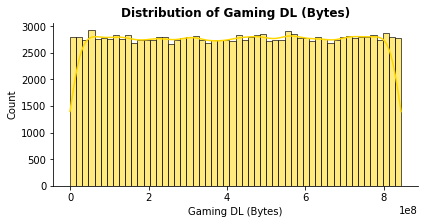

In [24]:
plot_hist(tellco_df, 'Gaming DL (Bytes)', 'gold')

as expected the `HTTP UL (Bytes)` histogram is skewed to the right. And all the rest have a skew score != 0 so I will use median as my method of imputation.

## Impute missing values

In [49]:
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('normalize', Normalizer()),
    # ('scale', MinMaxScaler()),
    
])

object_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent'))
])

# full_processor = ColumnTransformer(transformers=[
#     ('objects', categorical_pipeline, objects),
#     ('number', numeric_pipeline, numerical)
    
# ])

In [50]:
cleaned_numerical = pd.DataFrame(numeric_pipeline.fit_transform(tellco_df[numericals]))
cleaned_numerical.columns = numericals

cleaned_object = pd.DataFrame(object_pipeline.fit_transform(tellco_df[objects]))
cleaned_object.columns = objects

In [51]:
gc.collect()

0

In [52]:
cleaned_df = pd.concat([cleaned_object, cleaned_numerical], axis=1)
# cleaned_df.info()

In [53]:
### Check skewness of the columns

In [54]:
cleaned_df[numericals].skew(axis=0)

Start ms                                      3.376090
End ms                                        3.450132
Dur. (ms)                                     2.290367
Avg RTT DL (ms)                             115.572000
Avg RTT UL (ms)                               0.000000
Avg Bearer TP DL (kbps)                       5.574318
Avg Bearer TP UL (kbps)                       8.444077
TCP DL Retrans. Vol (Bytes)                  14.831839
TCP UL Retrans. Vol (Bytes)                  89.040759
DL TP < 50 Kbps (%)                           0.000000
50 Kbps < DL TP < 250 Kbps (%)                0.000000
250 Kbps < DL TP < 1 Mbps (%)                 0.000000
DL TP > 1 Mbps (%)                            0.000000
UL TP < 10 Kbps (%)                           0.000000
10 Kbps < UL TP < 50 Kbps (%)                 0.000000
50 Kbps < UL TP < 300 Kbps (%)                0.000000
UL TP > 300 Kbps (%)                          0.000000
HTTP DL (Bytes)                               4.979793
HTTP UL (B

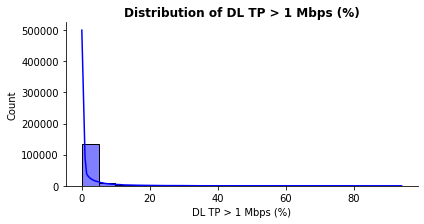

In [55]:
plot_hist(tellco_df, 'DL TP > 1 Mbps (%)', 'blue')

In [ ]:
plot_hist(tellco_df, 'Avg RTT DL (ms)', 'blue')

### See if the `Bearer Id` is unique for every row

In [12]:
tellco_df['Bearer Id'].unique().shape[0] == tellco_df.shape[0]

False

In [13]:
tellco_df[tellco_df['Bearer Id'].duplicated()]

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
30,1.30424259559124e+19,2019-04-18 00:35:00,711.0,2019-04-25 04:52:00,691.0,620248.0,208201008643031.0,33658752999.0,86540802106829.0,T29714B,...,1.843883e+06,1.509897e+07,1.217385e+07,1.059837e+07,3.661031e+08,1.327651e+07,1.957175e+08,1.420934e+07,55015623.0,386320481.0
50,1.30424259597083e+19,2019-04-20 02:55:00,691.0,2019-04-25 00:17:00,262.0,422560.0,208201771747176.0,33763531539.0,86376903225730.0,D72939C,...,1.600663e+07,1.949391e+07,1.208462e+07,4.858682e+06,6.494749e+08,4.900228e+06,7.271731e+08,6.679677e+06,39034473.0,685149296.0
62,1.30424259597083e+19,2019-04-21 02:55:00,73.0,2019-04-25 00:17:00,262.0,336160.0,208201771747176.0,33763531539.0,86376903225730.0,D72939C,...,2.283372e+07,1.095163e+07,1.842684e+07,8.632677e+06,5.769982e+08,9.724918e+06,4.469798e+08,1.406720e+07,46797611.0,632600264.0
72,7.27782565468596e+18,2019-04-21 13:57:00,724.0,2019-04-25 00:54:00,79.0,298626.0,208209501606924.0,33669127720.0,35405309150628.0,T86956A,...,6.740872e+06,3.322553e+06,1.428865e+07,2.003842e+06,8.286825e+08,1.191808e+07,5.430391e+08,1.099664e+07,32244625.0,863513434.0
88,1.30424259605271e+19,2019-04-22 03:04:00,495.0,2019-04-25 04:02:00,116.0,262665.0,208201401296320.0,33699429799.0,86376903425742.0,T70307A,...,1.188023e+06,4.484350e+06,1.653663e+07,1.958344e+07,4.931971e+08,7.698465e+06,7.787639e+08,1.417097e+07,49463345.0,517177788.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149979,1.30424259793288e+19,2019-04-29 07:28:00,139.0,2019-04-30 07:28:00,123.0,86399.0,208201908226045.0,33761846164.0,86376903281944.0,D29782C,...,2.124000e+03,9.462493e+06,1.339387e+07,8.997147e+06,1.135938e+08,9.054034e+06,3.919328e+08,3.045660e+05,28557860.0,135635937.0
149987,1.31144835733669e+19,2019-04-29 07:28:00,251.0,2019-04-30 10:11:00,675.0,96191.0,208201713533052.0,33664364225.0,35155409248549.0,T40618B,...,1.431809e+07,1.843050e+07,7.131223e+06,1.029478e+07,2.222525e+08,9.667879e+06,3.319765e+08,8.632246e+06,48514399.0,255377569.0
149994,1.31144835733672e+19,2019-04-29 07:28:00,83.0,2019-04-30 15:01:00,268.0,113545.0,208200313074099.0,33645655643.0,35155409288696.0,T88383B,...,2.304378e+07,1.917607e+07,1.876281e+07,9.591310e+06,8.106661e+08,1.485890e+07,7.778658e+08,1.469397e+07,59377936.0,862796008.0
149999,1.31144835733673e+19,2019-04-29 07:28:00,696.0,2019-04-30 10:40:00,327.0,97910.0,208202101098075.0,33619622058.0,86186204011457.0,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0
